(section-second_linear-oscillators)=
# Oscillators

In [1]:
using Plots,LaTeXStrings,Printf
default(linewidth=2,label="")

The distinguishing feature of second-order ODEs compared to the first-order case is that they permit oscillations as well as exponential growth and decay. These equations appear in models throughout engineering and science as a result.

For instance, an object attached to an ideal spring satisfies the ODE

```{math}
:label: eq-oscillators-free
mx'' + b x' + kx = 0,
```

where $x(t)$ is the displacement from the natural resting position, $m$ is the mass of the object, $b$ is an attenuation coefficient due to friction or mechanical damping, and $k$ is a property of the spring called the **spring constant**. This constant is the ratio of the restoring force of the spring to the amount by which it is stretched or compressed.

```{attention}
All named parameters such as $m$, $k$, and $b$ are assumed to be nonnegative unless stated otherwise.
```

```{note}
Equation {eq}`eq-oscillators-free` applies equally well to horizontal and vertical oscillations. Gravity does not appear in the vertical case because it is accounted for by measuring $x$ from the static equilibrium position.
```

If given, initial values for {eq}`eq-oscillators-free` supply the initial position and initial velocity, which determine the solution uniquely.

A pendulum is another type of mechanical oscillator. The proper ODE is

```{math}
\theta'' + \gamma \theta + \frac{g}{L}\sin (\theta) = 0,
```

where $\theta(t)$ is the angle made with vertically-down position, $L$ is the arm length, and $g$ is gravitational acceleration. This equation is nonlinear and difficult to analyze without developing new tools. But if the angle remains small, then a reasonable approximation is

```{math}
\theta'' + \gamma \theta + \frac{g}{L}\theta = 0,
```

which is a linear oscillator with constant coefficients.

An AC circuit typically has elements of resistance, capacitance, and inductance. These analogize perfectly to friction/damping, spring constant, and mass. If these elements are wired in series, the governing ODE is

```{math}
LI'' + RI' + \frac{1}{C}I = 0,
```

where $I(t)$ is the current flowing through the circuit, $L$ is inductance, $R$ is resistance, and $C$ is capacitance.

```{index} ! free oscillations, ! forced oscillations
```

These homogeneous models are examples of **free oscillations**. Of course, any of the models above might come with an external forcing function. For a pendulum, this could be someone pushing you on a swing, or for a circuit, it could be an AC generator. We call these **forced oscillations**.
## Unifying notation

When you have many versions of the same fundamental problem, each using different symbols and units, you have three options.

1. Solve each new problem from scratch.
2. Derive custom formulas for each application.
3. Find a minimal set of parameters and express the problem and solution in terms of them.

Option 1 is highly inefficient. Option 2 would be appropriate for an engineering course. Here, we take option 3 and develop generalized knowledge that can be reinterpreted for each new application.

The ODE of a free mass-spring oscillator, for example, has standard form
  
```{math}
x'' + \frac{b}{m} x' + \frac{k}{m} x = 0.
```

This suggests that we only need two parameters, not three, to express the full range of behavior. (An added convenience is that both $b/m$ and $\sqrt{k/m}$ have units of inverse time.) Accordingly, we introduce

```{math}
\omega_0 = \sqrt{\frac{k}{m}}, \qquad \zeta = \frac{b/m}{2\omega_0} = \frac{b}{\sqrt{4km}}.
```

The parameter $\omega_0$ is known as the **natural frequency**, with units of inverse time, and $\zeta$ is a dimensionless **damping coefficient** describing the relative intensity of the damping.

::::{important}
In math we usually use *frequency* to mean the multiplier of $t$ in a sin or cos function. That is our usage. In some fields this is called **angular frequency**, and *frequency* is used to mean the number of cycles per time unit, as in Hz.
::::

If we include a forcing term, we arrive at the ODE

```{math}
:label: eq-oscillators-unified
x'' + 2 \zeta \omega_0\, x' + \omega_0^2\, x = f(t).
```

A similar derivation can be done starting from the pendulum or AC circuit equations. The only type of forcing we shall consider is *harmonic* forcing of the form

$$
f(t) = \cos(\omega t).
$$


## Classifications

The characteristic roots of this ODE are  

```{math}
\lambda_{1,2} = -\zeta \omega_0 \pm \omega_0 \sqrt{\zeta^2-1}.
```

The discussion now splits into four cases, marked by increasing values of $\zeta$.

### Undamped oscillator, $\zeta=0$

The oscillator $x'' + \omega_0^2 x$ has homogeneous solutions that can be expressed either as combinations of 

$$
e^{i\omega_0 t},\, e^{-i\omega_0 t}
$$

or of 

$$
\cos(\omega_0 t),\, \sin(\omega_0 t).
$$

```{index} ! simple harmonic motion
```

Either way, these describe pure oscillation at frequency $\omega_0$. This is known as **simple harmonic motion**. A particularly useful third form is the **amplitude–phase form**

:::{math}
:label: eq-oscillators-amp-phase
x_h(t) = R\cos(\omega_0 t-\phi),
:::

where constants $R$ and $\phi$ can be used to satisfy initial conditions. 

::::{proof:example}
When a 2 kg mass is hung on a spring, the spring stretches by 0.25 m. What is the natural frequency of the mass-spring system? Suppose the mass is pulled down 0.2 m past equilibrium and then thrown upward at 1 m/s. What is the amplitude of the motion?

:::{dropdown} Solution
Hooke's Law for a spring states that $F=k x$, so we find the spring constant from $k=F/x=2g/0.25=8g$, where $g=9.8$ m per second squared. The ODE for free motion of the system is thus $2 x'' + 8g x = 0$, or

$$
x'' + 4g x   = 0.
$$

From this we identify the natural frequency

```{math}
\omega_0 = \sqrt{4g} = 2\sqrt{g} \approx 6.26 \text{s}^{-1}. 
```

We can apply the initial conditions directly to the phase–amplitude form:

\begin{align*}
-0.2 & = x(0) = R\cos(\phi) \\
1 & = x'(0) = -\omega_0 R\sin(\phi).
\end{align*}

Therefore,

```{math}
R^2 = [R\cos(\phi)]^2 + [R\sin(\phi)]^2 =  0.04 + \omega_0^{-2},
```

which works out to $R \approx 0.256 \text{m}$.
:::
::::

The particular solution for harmonic forcing $f(t)=\cos(\omega t)$ is 

$$
x_p(t) = \frac{1}{\omega_0^2-\omega^2} \cos(\omega t),
$$

provided $\omega\neq \omega_0$. Note that the harmonic amplitude grows without bound as $\omega\to \omega_0$. 

```{index} ! resonance
```

If the forcing is exactly at the natural frequency, then the situtation is like that of {numref}`Example {number} <example-variation_parameters-resonance>`:

$$
x_p(t) = \frac{1}{2 \omega_0} t \sin(\omega_0 t),
$$

which is unbounded as $t\to \infty$. This is known as **resonance**, one of the most important phenomena in physics.

### Underdamped oscillator, $0 < \zeta < 1$

For $0< \zeta < 1$ the roots of {eq}`eq-oscillators-unified` are complex, with negative real part:

```{math}
\lambda_{1,2} = -\zeta \omega_0 \pm i \omega_0 \sqrt{1-\zeta^2}.
```

Define the damped frequency 

:::{math}
:label: eq-oscillators-damped
\omega_d=\omega_0 \sqrt{1-\zeta^2}.
:::

The amplitude–phase form {eq}`eq-oscillators-amp-phase` easily generalizes to

```{math}
:label: eq-oscillators-transient
x_h(t) = R\, e^{- \omega_0 \zeta t} \cos( \omega_d t - \phi),
```

where $R$ and $\phi$ are determined by the initial conditions. This solution is pseudoperiodic, combining oscillation at frequency $\omega_d < \omega_0$ inside an exponential decay envelope. We call this an **underdamped oscillator**.

The homogeneous solution {eq}`eq-oscillators-transient` is also called a **transient solution**, because it vanishes as $t \to \infty$. If harmonic forcing $f(t)=\cos(\omega t)$ is added, then it determines the long-term behavior $x_p=A\cos(\omega t - \theta)$, where

:::{math}
:label: eq-oscillators-gain
A = \frac{1}{\rule{0pt}{1em} \sqrt{\rule{0pt}{0.8em}(\omega_0^2-\omega^2)^2 + 4\omega_0^2\omega^2 \zeta^2 } }
:::

The value $A$ is known as the **gain** of the oscillator; it is the ratio of amplitudes of the steady response and the forcing. A little calculus shows that as a function of $\omega$, the gain is maximized at 

```{math}
:label: eq-oscillators-rhomax
\omega_\text{max} = \begin{cases} 
\omega_0 \sqrt{1-2\zeta^2}, & \text{ if } 0 < \zeta^2 < \frac{1}{2},\\ 0, & \text{ if } \frac{1}{2} \le \zeta^2.
\end{cases}
```

If the damping coefficient $\zeta$ is small but finite, then, we have a pseudoresonance of finite amplitude at a frequency just a bit less than the natural frequency. The following figure shows the gain as a function of driving frequency and damping when $\omega_0=1$. The black curve shows the maximal driving frequency at any given $\zeta$.

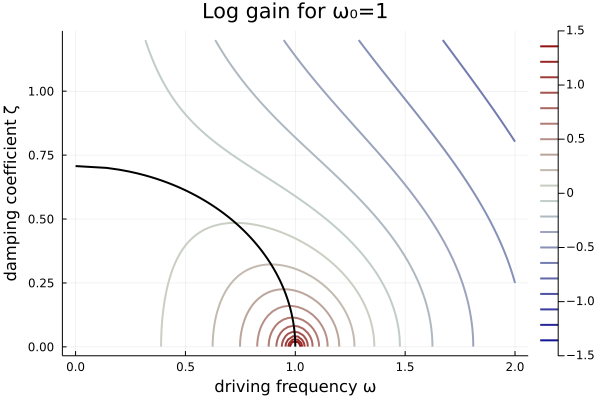

In [2]:
ω = range(1e-3,2,length=90)
ζ = range(1e-3,1.2,length=90)
A = [ 1/(1-ω^2 + 2im*z*ω ) for ω in ω, z in ζ ]
log_g = @. log10(abs(A))
contour(ω,ζ,log_g',levels=20,l=(:bluesreds,2),clims=(-1.5,1.5))
ζ = range(1e-3,1/sqrt(2),length=100)
ωmax = @. real( sqrt(1+0im-2ζ^2) ) 
plot!(ωmax,ζ,l=(:black),
  xlabel="driving frequency ω", ylabel="damping coefficient ζ", title="Log gain for ω₀=1")

Here's a short video showing how the gain of an oscillator varies with the forcing frequency $\omega$. (I use the term "eigenvalues" to mean characteristic values here.) 

<div>
<iframe id="kaltura_player" src="https://cdnapisec.kaltura.com/p/2358381/sp/235838100/embedIframeJs/uiconf_id/43030021/partner_id/2358381?iframeembed=true&playerId=kaltura_player&entry_id=1_izrey0ty&flashvars[streamerType]=auto&amp;flashvars[localizationCode]=en&amp;flashvars[leadWithHTML5]=true&amp;flashvars[sideBarContainer.plugin]=true&amp;flashvars[sideBarContainer.position]=left&amp;flashvars[sideBarContainer.clickToClose]=true&amp;flashvars[chapters.plugin]=true&amp;flashvars[chapters.layout]=vertical&amp;flashvars[chapters.thumbnailRotator]=false&amp;flashvars[streamSelector.plugin]=true&amp;flashvars[EmbedPlayer.SpinnerTarget]=videoHolder&amp;flashvars[dualScreen.plugin]=true&amp;flashvars[Kaltura.addCrossoriginToIframe]=true&amp;&wid=1_s72ikzpz" width="400" height="285" allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" frameborder="0" title="Kaltura Player"></iframe>
</div>

### Critically damped oscillator, $\zeta = 1$
		
At $\zeta=1$ the complex roots coalesce into a double real root,

```{math}
\lambda_1 = \lambda_2 = -\omega_0,
```

with general homogeneous solution

```{math}
x_h(t) = e^{-\omega_0 t} (c_1 + c_2 t).
```

There is no longer any oscillation present, and we have a **critically damped** system. The linear growth of $c_2 t$ doesn't make much of a difference against the exponential decay, and $x_h\to 0$ as $t\to\infty$. Any steady response is due to the forcing term, but no resonance is possible.

### Overdamped, $\zeta >1$

For $\zeta > 1$ the roots are

```{math}
\lambda_{1,2} =  -\omega_0 \zeta \pm \omega_0 \sqrt{\zeta^2-1},
```

which are negative and real. This gives an exponentially decaying homogeneous solution. In this case we have an **overdamped** oscillator. Again, no resonance is possible.

## Examples

```{list-table} Damping coefficient and characteristic values
:header-rows: 1
:name: table-secondlin-oscillators

* - Damping coefficient 
  - Root property
  - Description
* - $\zeta=0$
  - imaginary
  - undamped
* - $0 < \zeta < 1$
  - complex
  - underdamped
* - $\zeta=1$
  - real, negative, repeated
  - critically damped
* - $\zeta > 1$
  - real, negative, distinct 
  - overdamped
```

::::{proof:example}

A 5 kg mass is hung on a spring with constant $11$ N per m and connected to a dashpot that provides 8 N-sec per meter of resistance. Is this system underdamped, overdamped, or critically damped?

:::{dropdown} Solution
The ODE for the mass-spring system is

\begin{align*}
    5 x'' + 8x' + 11 x  & = 0 ,\\
    x'' + 1.6 x' + 2.2 x  & = 0, 
\end{align*}

from which we identify the natural frequency

```{math}
  \omega_0 = \sqrt{2.2} \approx 1.483 \text{s}^{-1}.
```

The damping coefficient is therefore

```{math}
  Z = \frac{1.6}{2\omega_0} \approx 0.539.
```

Since this value is less than one, the system is underdamped.
:::
::::

::::{proof:example} 

Suppose the system from the previous example is initially at equilibrium when the mass is suddenly pushed downward at 0.5 m/sec. Find the motion of the mass.

:::{dropdown} Solution
We derived the governing ODE $x'' + 1.6 x' + 2.2 x = 0$. The roots are the roots of $\lambda^2 + 1.6\lambda + 2.2$, which are found numerically to be

```{math}
  \lambda \approx -0.8000 \pm 1.2490i.
```

(The imaginary part is smaller than the natural frequency found in the last example, as it must be.) Choosing the sin-cos form of the general solution, we have

$$
x_h(t) = a_1 e^{-0.8 t} \cos(1.249 t) + a_2 e^{-0.8 t} \sin(1.249 t).
$$

We apply the initial conditions $x(0)=0$, $x'(0)=-0.5$ to find

\begin{align*}
0 & = x_h(0) = a_1, \\ 
-0.5 & = x_h'(0) = a_1( -0.8 ) + a_2 (1.249 ),
\end{align*}

thus $a_2 = -0.4003$. The motion is therefore given by $x(t)=-0.4003\, e^{-0.8 t} \sin(1.249 t)$.
:::
::::